# **1. Perkenalan Dataset**
**Datasets: Shop Customer Data**

Dataset ini dibuat untuk klasifikasi produk, pengelompokan, dan pencocokan entitas.

**Dataset terdiri dari 35311 baris dan 7 kolom:**

1. Product ID
2. Product Title
3. Merchant ID
4. Cluster ID',
5. Cluster Label
6. Category ID
7. Category Label

# **2. Import Library**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Datasets**

In [35]:
df = pd.read_csv("./df_clustering.csv")
df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


# **4. Exploratory Data Analysis (EDA)**

In [36]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [37]:
# Melihat statistik deskiptif data
df.describe(include="all")

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
count,35311.000000,35311,35311.000000,35311.000000,35311,35311.000000,35311
unique,NaN,30993,NaN,NaN,12849,NaN,10
top,NaN,washing machine,NaN,NaN,Canon IXUS 185,NaN,Fridge Freezers
freq,NaN,90,NaN,NaN,27,NaN,5501
mean,26150.800176,NaN,120.501883,30110.687633,NaN,2618.142930,NaN
std,13498.191220,NaN,117.045557,18410.265642,NaN,3.600708,NaN
min,1.000000,NaN,1.000000,1.000000,NaN,2612.000000,NaN
25%,14958.500000,NaN,17.000000,6123.000000,NaN,2615.000000,NaN
50%,27614.000000,NaN,75.000000,40630.000000,NaN,2619.000000,NaN
75%,37508.500000,NaN,253.000000,44059.000000,NaN,2622.000000,NaN


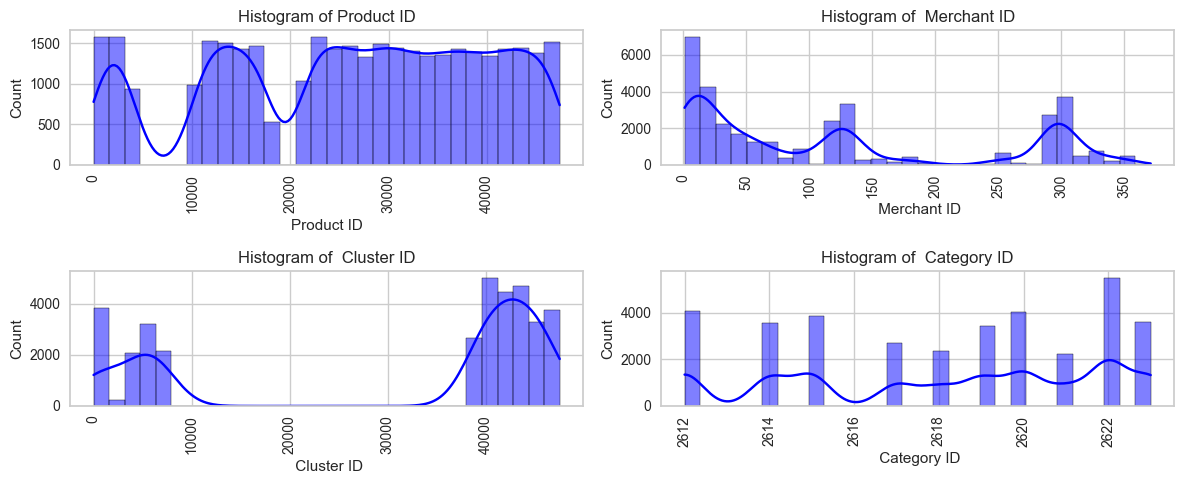

In [38]:
# Melihat distribusi data numerik dengan Histrogram
df_numeric = df.select_dtypes(include="number")
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(df_numeric):
    sns.histplot(data=df[col], ax=axes[i], kde=True, color="blue", bins=30)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

In [39]:
# Melihat jumlah nilai unik data categoric
df_categoric = df.select_dtypes(include="object")
for col in df_categoric:
    nunique = df_categoric[col].nunique()
    print(f"jumlah nilai unik kolom {col}: {nunique}")

jumlah nilai unik kolom Product Title: 30993
jumlah nilai unik kolom  Cluster Label: 12849
jumlah nilai unik kolom  Category Label: 10


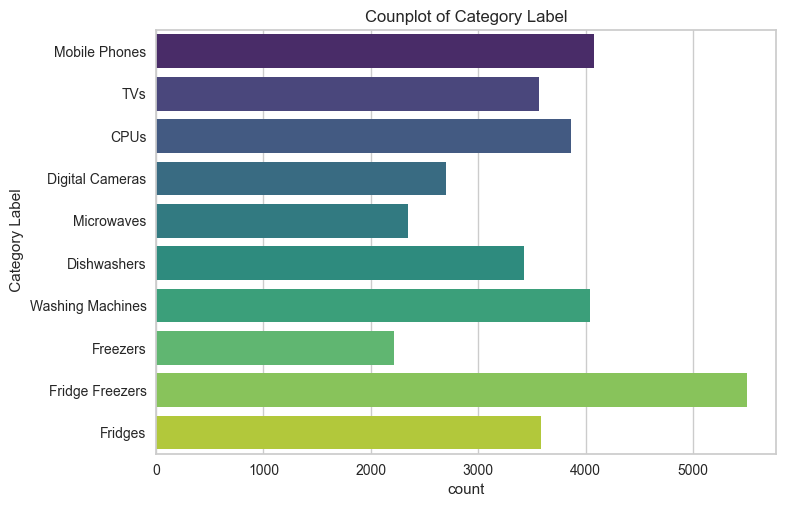

In [40]:
# Melihat distribusi data Category Label dengan counplot
sns.countplot(y=df[" Category Label"], palette="viridis", hue=df[" Category Label"])
plt.title("Counplot of Category Label")

plt.show()

In [41]:
# Melihat distribusi data categoric dengan counplot
df_categoric = df.select_dtypes(include="object")
len(df_categoric[" Category Label"].value_counts())

10

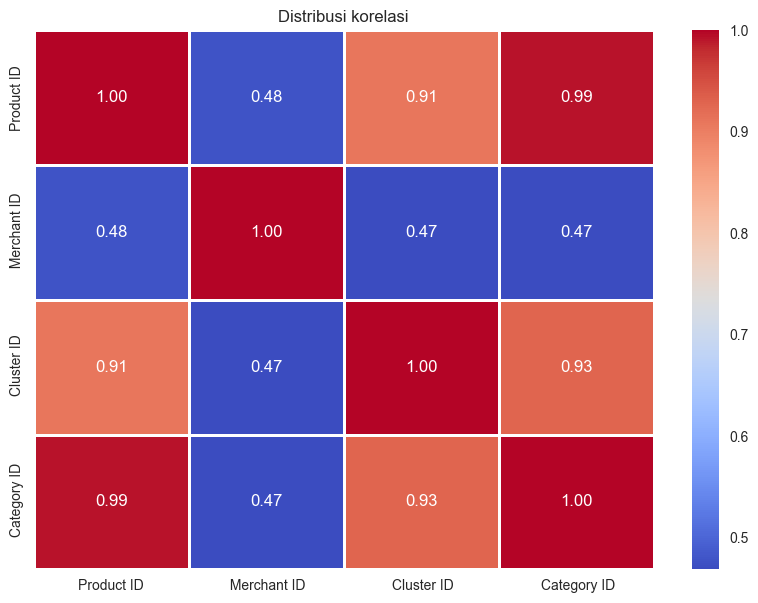

In [42]:
# Melihat Distribusi korelasi
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Distribusi korelasi")
plt.show()

#### **Feature: Cluster ID dan Category ID, Product ID dan Category ID serta Product ID dan Cluster ID, feature memiliki korelasi lebih dari 0.90, dengan itu menghapus salah satu feature untuk menghindari redundansi dan meningkatkan kinerja model**

In [43]:
df = df.drop(columns=["Product ID", " Cluster ID"])

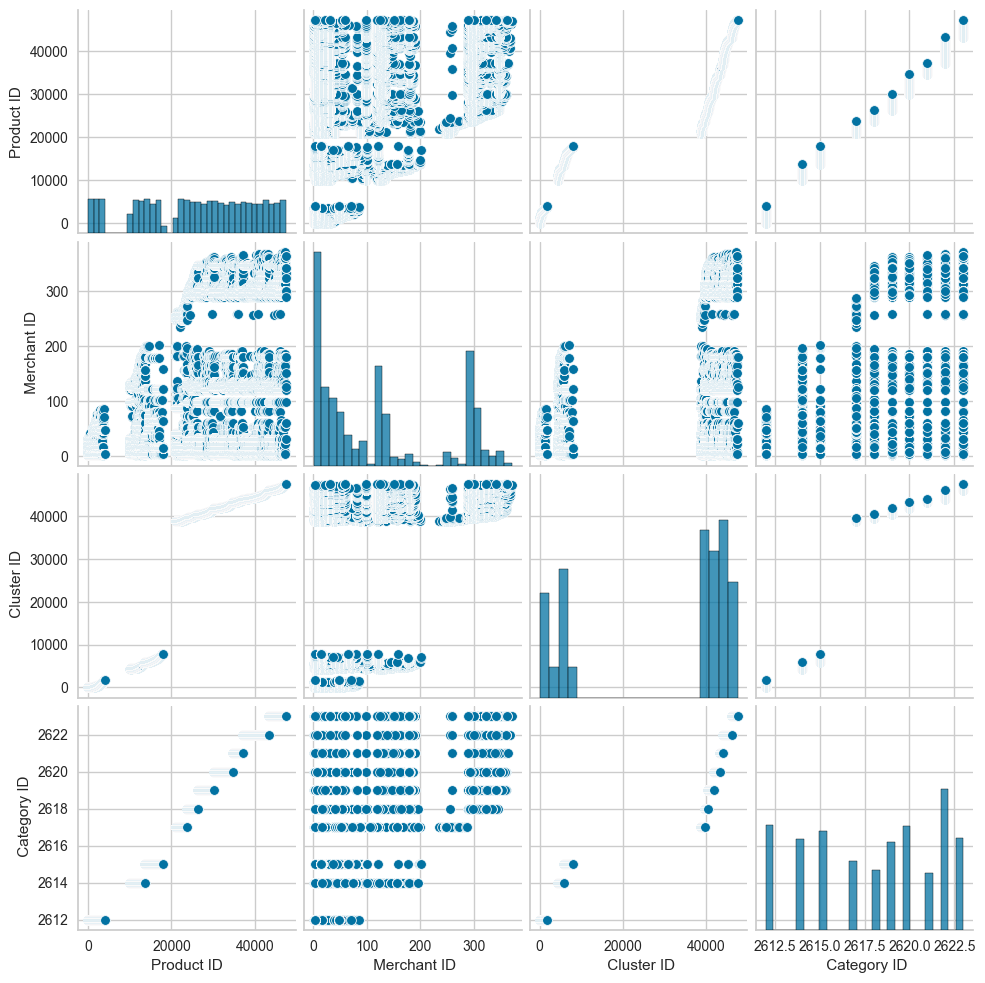

In [44]:
# Melihat scatter plot data numerik
sns.pairplot(df_numeric)
plt.show()

# **5. Data Preprocessing**

In [45]:
# Melihat Missing Value
df.isna().sum()

Product Title      0
 Merchant ID       0
 Cluster Label     0
 Category ID       0
 Category Label    0
dtype: int64

In [46]:
df.duplicated().sum()

np.int64(174)

#### **Terdapat 174 data duplikat, maka dari itu baris duplikat akan dihapus dengan pertimbangan hanya sedikit baris duplikat dibandingkan data yang ada**

In [47]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [48]:
# Mencadangkan data asli
df_original = df.copy()
df_original

,Product Title,Merchant ID,Cluster Label,Category ID,Category Label
0,apple iphone 8 plus 64gb silver,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,apple iphone 8 plus 64 gb spacegrau,2,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,apple iphone 8 plus 64gb space grey,4,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
...,...,...,...,...,...
35306,smeg fab28 60cm retro style right hand hinge f...,59,Smeg FAB28 Cream,2623,Fridges
35307,smeg fab28 60cm retro style left hand hinge fr...,59,Smeg FAB28 Red,2623,Fridges
35308,smeg fab28 60cm retro style left hand hinge fr...,59,Smeg FAB28 Pink,2623,Fridges
35309,candy 60cm built under larder fridge cru160nek,125,Candy CRU16.0,2623,Fridges


In [49]:
# Transformasi data numerik
scaler = StandardScaler()

numeric_colums = df.select_dtypes(include="number").columns
df[numeric_colums] = scaler.fit_transform(df[numeric_colums])

df.head()

,Product Title,Merchant ID,Cluster Label,Category ID,Category Label
0,apple iphone 8 plus 64gb silver,-1.022159,Apple iPhone 8 Plus 64GB,-1.709389,Mobile Phones
1,apple iphone 8 plus 64 gb spacegrau,-1.013629,Apple iPhone 8 Plus 64GB,-1.709389,Mobile Phones
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,-1.005099,Apple iPhone 8 Plus 64GB,-1.709389,Mobile Phones
3,apple iphone 8 plus 64gb space grey,-0.996569,Apple iPhone 8 Plus 64GB,-1.709389,Mobile Phones
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,-0.988039,Apple iPhone 8 Plus 64GB,-1.709389,Mobile Phones


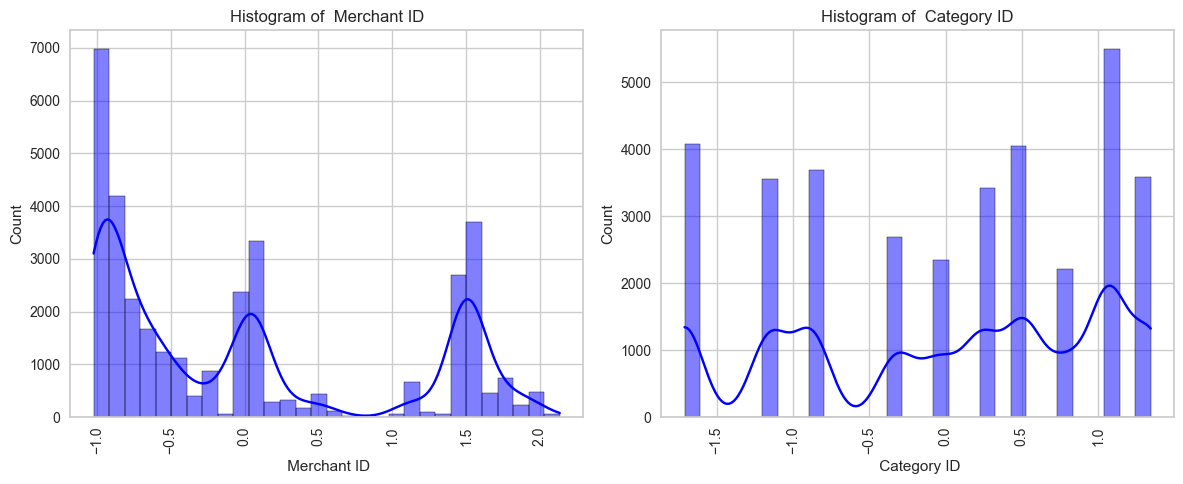

In [50]:
# Melihat distribusi data numerik dengan Histrogram setelah standarisasi
df_numeric = df[numeric_colums]
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(df_numeric):
    sns.histplot(data=df[col], ax=axes[i], kde=True, color="blue", bins=30)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

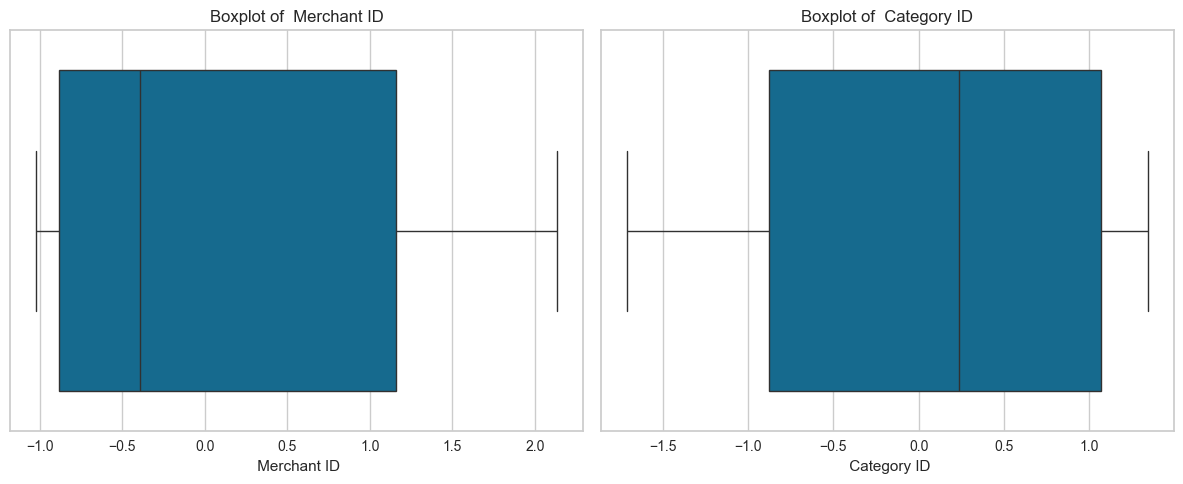

In [51]:
# Boxplot sebelum menghapus outliers
df_numeric = df[numeric_colums]
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(df_numeric):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

#### **Berdasarkan Box Plot terlihat bahwa tidak terdapat outliers**

In [52]:
# Encoding data caterogis
encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include="object").columns

for col in df[categorical_columns]:
    df[col] = encoder.fit_transform(df[col])

df.head()

,Product Title,Merchant ID,Cluster Label,Category ID,Category Label
0,2561,-1.022159,909,-1.709389,7
1,2559,-1.013629,909,-1.709389,7
2,2656,-1.005099,909,-1.709389,7
3,2563,-0.996569,909,-1.709389,7
4,2565,-0.988039,909,-1.709389,7


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

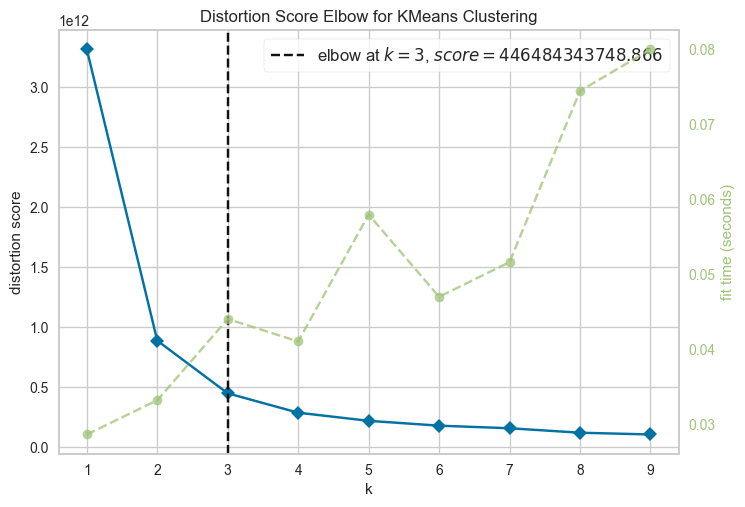

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
# Memilih jumlah K untuk K-Means
X = df
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(X)
visualizer.show()

In [54]:
# Pembangunan Model K-Means Clustering tanpa PCA
model_km = KMeans(n_clusters=3, random_state=0)
model_km.fit(X)
labels_km = model_km.labels_

# Pembangunan Model DBSCAN Clustering tanpa PCA
model_dbscan = DBSCAN(eps=0.5, min_samples=3)
model_dbscan.fit(X)
labels_dbscan = model_dbscan.labels_

In [55]:
# Melihat Silhouette Score
sil_score_km = silhouette_score(X, model_km.labels_)
print(f'Silhouette Score K-Means sebelum PCA: {sil_score_km}')

sil_score_dbscan = silhouette_score(X, labels_dbscan)
print(f'Silhoutte Score DBSCAN sebelum PCA: {sil_score_dbscan}')

Silhouette Score K-Means sebelum PCA: 0.5581887071938169
Silhoutte Score DBSCAN sebelum PCA: -0.9041698111761208


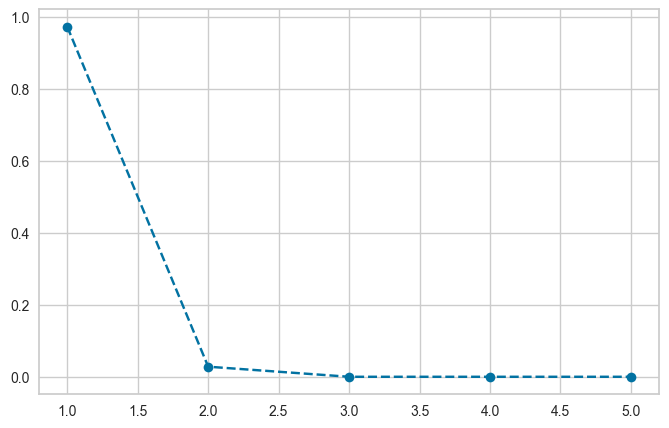

In [56]:
# Menggunakan Scree Plot untuk menentukan c_component pada PCA
pca = PCA()
pca.fit(X)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.show()

#### **Memilih n_component= 2 berdasarkan Scree Plot**

In [57]:
# Pembangunan Model K-Means Clustering dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

model_km_pca = KMeans(n_clusters=3, random_state=0)
model_km.fit(X_pca)
labels_km = model_km.predict(X_pca)

# Pembangunan Model DBSCAN Clustering dengan PCA
model_dbscan = DBSCAN(eps=0.5, min_samples=4)
model_dbscan.fit(X_pca)
labels_dbscan = model_dbscan.labels_

## **b. Evaluasi Model Clustering**

In [58]:
# Melihat Silhouette Score
sil_score_km = silhouette_score(X_pca, labels_km)
print(f'Silhouette Score K-Means setelah PCA: {sil_score_km}')

sil_score_dbscan = silhouette_score(X_pca, labels_dbscan)
print(f'Silhoutte Score DBSCAN sebelum PCA: {sil_score_dbscan}')

Silhouette Score K-Means setelah PCA: 0.5581791522421231
Silhoutte Score DBSCAN sebelum PCA: -0.7797525939863212


#### **Memilih K-MEANS karena memiliki Silhoutte Score yang lebih baik**

## **c. Visualisasi Hasil Clustering**

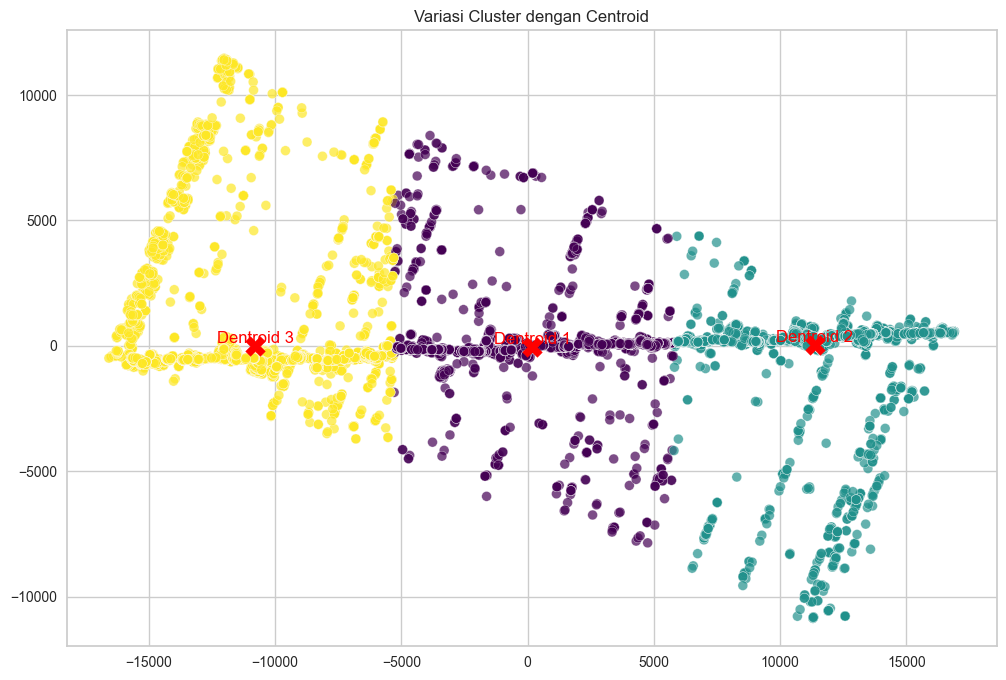

In [59]:
# Membuat visualisasi hasil clustering K-MEANS
labels = model_km.labels_
centroid = model_km.cluster_centers_

plt.figure(figsize=(12, 8))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='white', marker='o')

plt.scatter(centroid[:,0], centroid[:,1], color="red", s=200, marker="X", label="Centroids")

for i, centroid in enumerate(centroid):
    plt.text(centroid[0], centroid[1], f"Dentroid {i+1}", color="red", ha="center", va="bottom")

plt.title("Variasi Cluster dengan Centroid")

plt.show()

## **d. Analisis dan Interpretasi Hasil Cluster**

#### **Analisis Hasil Cluster**

In [60]:
# Tabel Kontribusi Fitur terhadap PCA
loading_matrix = pca.components_
loading_df = pd.DataFrame(loading_matrix, columns=df.columns)
loading_df

,Product Title,Merchant ID,Cluster Label,Category ID,Category Label
0,0.935547,0.000003,0.353203,-0.000007,0.000029
1,-0.353203,-0.000001,0.935547,0.000003,0.000114


In [61]:
# Menambahkan hasil clustering
clusters = model_km.fit_predict(X_pca)
df['Cluster'] = clusters
df_original['Cluster'] = clusters

In [62]:
# Memisahkan tiap cluster
cluster_1 = df_original[df_original["Cluster"] == 0]
cluster_2 = df_original[df_original["Cluster"] == 1]
cluster_3 = df_original[df_original["Cluster"] == 2]

In [63]:
# Melihat Category Label terbanyak tiap cluster
category_label_1 = cluster_1[" Category Label"].value_counts().head(1)
category_label_2 = cluster_2[" Category Label"].value_counts().head(1)
category_label_3 = cluster_3[" Category Label"].value_counts().head(1)
pd.concat([category_label_1, category_label_2, category_label_3])

 Category Label
CPUs               2484
TVs                2034
Fridge Freezers    2159
Name: count, dtype: int64

In [64]:
# Melihat dominasi product cluster 1
cluster_label_1 = cluster_1.value_counts(cluster_1[" Cluster Label"]).head(30)
cluster_label_1

 Cluster Label
LG OLED65B8PLA                        17
LG 43UK6300PLB                        17
LG 55UK6300PLB                        15
LG 49UK6300PLB                        15
Hisense RQ560N4WC1                    14
Hotpoint BHWD149/1                    14
LG OLED55E8PLA                        12
LG OLED55B8PLA                        12
Hotpoint BHWM1292                     12
Hotpoint WDAL8640G                    12
Intel Core i7-7700 3.6GHz Box         12
LG 50UK6500PLA                        12
Liebherr GP2033 White                 12
Huawei Honor 10 128GB Dual SIM        12
Hisense RB385N4EW1 White              12
Hotpoint RZAAV22K Black               12
LG 65UK6300PLB                        12
LG OLED55C8PLA                        12
Nikon CoolPix B500                    11
Hisense RL170D4BC2 Stainless Steel    11
Neff W543BX0GB                        11
Intel Core i5-7600K 3.80GHz  Box      11
Moto G6 32GB                          11
LG OLED65E8PLA                        11
I

In [65]:
# Melihat dominasi product cluster 2
cluster_label_2 = cluster_2.value_counts(cluster_2[" Cluster Label"]).head(30)
cluster_label_2

 Cluster Label
Samsung UE75NU7100                     22
Samsung UE65NU7100                     22
Samsung UE49NU7100                     22
Samsung UE43NU7400                     21
Samsung UE55NU8000                     20
Samsung UE65NU7400                     20
Samsung UE65NU8000                     20
Samsung Galaxy S8 64GB                 19
Samsung UE55NU7400                     19
Samsung UE49NU8000                     19
Samsung UE55NU7100                     18
Samsung UE75NU8000                     18
Samsung UE40NU7120                     18
Samsung UE82NU8000                     18
Samsung UE50NU7400                     17
Sony Cyber-shot DSC-W810               17
Panasonic Lumix DMC-FT30               17
Samsung Galaxy A3 SM-A320F             16
Sony Xperia XZ1 Compact                15
Sony Cyber-shot DSC-W800               15
Praktica Luxmedia Z212                 15
Samsung RR39M7340BC Black              15
Sony Xperia XA2 Ultra 32GB             15
Samsung Galaxy S8+ 

In [66]:
# Melihat dominasi product cluster 3
cluster_label_3 = cluster_3.value_counts(cluster_3[" Cluster Label"]).head(30)
cluster_label_3

 Cluster Label
Canon IXUS 185                      27
Canon PowerShot SX730 HS            23
Canon IXUS 285 HS                   21
Canon PowerShot SX620 HS            20
Apple iPhone 8 Plus 64GB            19
Bosch WIW28300GB                    19
Apple iPhone X 64GB                 18
Bosch WAN28201GB                    18
Apple iPhone 8 64GB                 18
Apple iPhone 7 32GB                 18
Bosch KGN34NW3AG White              18
Bosch SMS25AW00G White              18
Apple iPhone X 256GB                17
Apple iPhone 7 Plus 32GB            17
Bosch HMT84M461B Black              16
Doro 5030                           16
Apple iPhone 8 256GB                16
Apple iPhone 7 128GB                16
Apple iPhone 8 Plus 256GB           15
Bosch WAT28371GB                    15
Bosch HMT75G451B Stainless Steel    15
Bosch SMS46IW04G White              15
Canon EOS 200D + 18-55mm IS STM     15
Bosch WVG30462GB                    15
Bosch KGN36HI32 Stainless Steel     15
Bosch KGN3

#### **Interpretasi Hasil Cluster**
**1. Cluster 1:** Cluster 1 didominasi oleh Kategori CPUs yaitu sebanyak 2484 product dan didominasi oleh product dari Samsung

**2. Cluster 2:** Cluster 2 didominasi oleh Kategori TVs yaitu sebanyak 2034 product dan didominasi oleh product dari LG

**3. Cluster 3:** Cluster 3 didominasi oleh Kategori Fridge Freezers yaitu sebanyak 2159 product, dan didominasi oleh product dari Canon, Apple, dan Bosch

# **7. Mengeksport Data**

In [ ]:
df.to_csv('df_classification.csv', index=False)